In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in tqdm(os.walk('/kaggle/input')):
    sleep(0.01)
    d=dirname.split(os.path.sep)[-1]
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bionlp13cg_md-0.2.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz            
!pip install scispacy

     |████████████████████████████████| 70.1 MB 131 kB/s eta 0:00:014��██████████████▋             | 40.8 MB 778 kB/s eta 0:00:38 eta 0:00:25
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.2.4-py3-none-any.whl size=70542691 sha256=98d529700c6fbb251eebc3ea97439637060c59622386baa664d1dc022fafc22e
  Stored in directory: /root/.cache/pip/wheels/50/b2/7d/53cff131cb37c8b0197b02f45eb827ff4bb00b119c3a591b4d
Successfully built en-ner-bionlp13cg-md
     |████████████████████████████████| 125.1 MB 42 kB/s  eta 0:00:01    |████▉                           | 19.1 MB 759 kB/s eta 0:02:20     |████████████▏                   | 47.7 MB 846 kB/s eta 0:01:32     |████████████▋                   | 49.1 MB 846 kB/s eta 0:01:30��██▌           | 80.1 MB 796 kB/s eta 0:00:57█████████████████████           | 82.2 MB 796 kB/s eta 0:00:54████████████████          | 86.0 MB 796 kB/s eta 0:00:506 MB 805 kB/s eta 0:00:06
     |████████████████████████████████| 12.8 MB 7.1 MB/s eta 0:00:01

In [ ]:
import scispacy
import en_ner_bionlp13cg_md
import en_ner_bc5cdr_md
import spacy
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker
nlp = spacy.load("en_ner_bc5cdr_md")

/opt/conda/lib/python3.7/site-packages/spacy/util.py:715: UserWarning: [W094] Model 'en_ner_bionlp13cg_md' (0.2.4) specifies an under-constrained spaCy version requirement: >=2.2.1. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.0.5,<3.1.0
  warnings.warn(warn_msg)


In [ ]:
!pip install spacy==2.2

In [ ]:
datafiles = [
    '../input/CORD-19-research-challenge/document_parses/pdf_json/0000028b5cc154f68b8a269f6578f21e31f62977.json',
    '../input/CORD-19-research-challenge/document_parses/pdf_json/00006903b396d50cc0037fed39916d57d50ee801.json',
    '../input/CORD-19-research-challenge/document_parses/pdf_json/0000fcce604204b1b9d876dc073eb529eb5ce305.json',
    '../input/CORD-19-research-challenge/document_parses/pdf_json/000122a9a774ec76fa35ec0c0f6734e7e8d0c541.json',
    '../input/CORD-19-research-challenge/document_parses/pdf_json/0001418189999fea7f7cbe3e82703d71c85a6fe5.json',
    '../input/CORD-19-research-challenge/document_parses/pdf_json/00035ac98d8bc38fbca02a1cc957f55141af67c0.json',
    '../input/CORD-19-research-challenge/document_parses/pdf_json/00039b94e6cb7609ecbddee1755314bcfeb77faa.json',
    '../input/CORD-19-research-challenge/document_parses/pdf_json/000379d7a7f37a2ccb978862b9f2016bd03259ea.json',
    '../input/CORD-19-research-challenge/document_parses/pmc_json/PMC1065028.xml.json',
    '../input/CORD-19-research-challenge/document_parses/pmc_json/PMC1065257.xml.json',
    '../input/CORD-19-research-challenge/document_parses/pmc_json/PMC1072806.xml.json',
    '../input/CORD-19-research-challenge/document_parses/pmc_json/PMC1065120.xml.json',
    '../input/CORD-19-research-challenge/document_parses/pmc_json/PMC1084330.xml.json',
    '../input/CORD-19-research-challenge/document_parses/pmc_json/PMC1087510.xml.json'
]

In [ ]:
import json
with open(datafiles[0], 'r')as f1:
    sample = json.load(f1)
    

In [ ]:
for key,value in sample.items():
    print(key)

paper_id
metadata
abstract
body_text
bib_entries
ref_entries
back_matter


##GETTING DATA FROM CORD 19 DATASET AND EXTRACTING INFORMATION FROM THAT AND THEN NER

In [ ]:
id2title = []
for file in datafiles:
    with open(file,'r')as f:
        doc = json.load(f)
    id = doc['paper_id'] 
    title = doc['metadata']['title']
    id2title.append({id:title})

In [ ]:
id2abstract = []
for file in datafiles:
    with open(file,'r')as f:
        doc = json.load(f)
    id = doc['paper_id'] 
    abstract = ''
    for item in doc['abstract']:
        abstract = abstract + item['text']
        
    id2abstract.append({id:abstract})

In [ ]:
id2bodytext = []
for file in datafiles:
    with open(file,'r')as f:
        doc = json.load(f)
    id = doc['paper_id'] 
    bodytext = ''
    for item in doc['body_text']:
        bodytext = bodytext + item['text']
        
    id2bodytext.append({id:bodytext})

In [ ]:
text = id2abstract[0].get(list(id2abstract[0].keys())[0])


In [ ]:
doc = nlp(text)
d_i=displacy.render(doc,jupyter=True,style='ent')

/opt/conda/lib/python3.7/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
displacy.render(next(doc.sents), style='dep', jupyter=True)

In [ ]:
for x in doc.ents:
    print(x.text,x.label_)

In [ ]:
text1 = id2bodytext[0].get(list(id2bodytext[0].keys())[0])
doc1 = nlp(text1)
d_i=displacy.render(doc1,jupyter=True,style='ent')
for x in doc1.ents:
    print(x.text,x.label_)

COVID-19 CHEMICAL
death DISEASE
COVID-19 CHEMICAL
infectious disease DISEASE
coronavirus infection DISEASE
COVID-19 CHEMICAL
colorectal diseases DISEASE
COVID-19 CHEMICAL
COVID-19 CHEMICAL
COVID-19 CHEMICAL
COVID-19 CHEMICAL
coronavirus infection DISEASE
COVID-19 CHEMICAL
infectious diseases DISEASE
COVID-19 CHEMICAL
malignancies DISEASE
cardiovascular pathologies DISEASE
infections DISEASE
COVID-19 CHEMICAL
coronavirus infection DISEASE
benign disorders DISEASE
precancerous lesions DISEASE
colorectal cancer DISEASE
COVID-19 CHEMICAL
smoke CHEMICAL


In [ ]:
text1 = id2bodytext[0].get(list(id2bodytext[0].keys())[0])
doc1 = nlp(text1)
d_i=displacy.render(doc1,jupyter=True,style='ent')
for x in doc1.ents:
    print(x.text,x.label_)

COVID-19 CHEMICAL
death DISEASE
COVID-19 CHEMICAL
infectious disease DISEASE
coronavirus infection DISEASE
COVID-19 CHEMICAL
colorectal diseases DISEASE
COVID-19 CHEMICAL
COVID-19 CHEMICAL
COVID-19 CHEMICAL
COVID-19 CHEMICAL
coronavirus infection DISEASE
COVID-19 CHEMICAL
infectious diseases DISEASE
COVID-19 CHEMICAL
malignancies DISEASE
cardiovascular pathologies DISEASE
infections DISEASE
COVID-19 CHEMICAL
coronavirus infection DISEASE
benign disorders DISEASE
precancerous lesions DISEASE
colorectal cancer DISEASE
COVID-19 CHEMICAL
smoke CHEMICAL


In [ ]:
chemicals = []
diseases=[]
for i in range (len(id2abstract)):
    pid = list(id2abstract[i].keys())[0]
    text = id2abstract[i].get(pid)
    doc = nlp(text)
    for en in doc.ents:
        if en.label_== 'CHEMICAL':
            chemicals.append(en)
        if en.label_=='DISEASE':
            diseases.append(en)

In [ ]:
chem = list(map(str, chemicals)) # => [1,2,3]
dis=list(map(str, diseases))

In [ ]:
from collections import Counter
d = Counter(dis)
c = Counter(chem)

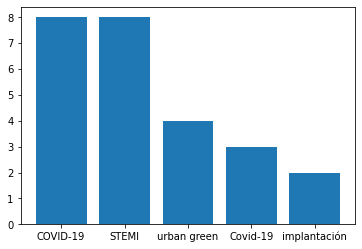

In [ ]:
common_chem = c.most_common(5)
common_disease= d.most_common(5)
import matplotlib.pyplot as plt
common_chem = dict(common_chem)


plt.bar(range(len(common_chem)), list(common_chem.values()),align='center')
plt.xticks(range(len(common_chem)), list(common_chem.keys()))
plt.show()

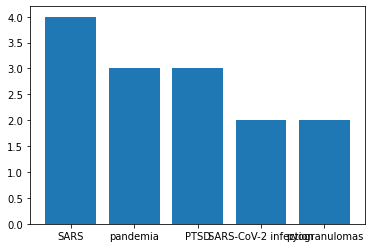

In [ ]:
common_disease = dict(common_disease)


plt.bar(range(len(common_disease)), list(common_disease.values()),align='center')
plt.xticks(range(len(common_disease)), list(common_disease.keys()))
plt.show()